In [3]:
%matplotlib inline

import pandas as pd
from pandas import DataFrame
import datetime
import pandas.io.data
import numpy as np
#from itertools import izip

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('ggplot')

/home/vinodrao/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
#ICD_list table must be re-built from, presumably, ICD_for_Enc due to some entries being
#pre-18th birthday.  ICD_list entries are not timestamped!
table_names = ['all_encounter_data', 'demographics', 'encounters', 'family_hist_for_Enc',
 'family_hist_list', 'ICD_for_Enc', 'ICD_list', 'macula_findings_for_Enc',
 'SL_Lens_for_Enc', 'SNOMED_problem_list', 'systemic_disease_for_Enc', 'systemic_disease_list']

In [5]:
#path = 'C:/Users/relli/Google Drive/math.iit.edu/research/ICO/YiPang-2D-regression/'
path = '/home/vinodrao/Spring2017/CSP571/project/'
#path = path + 'DM_List_Pull_11222016_orig_tables/'
dfs = [pd.read_pickle(path + name + '.pickle') if name != 'ICD_list' else None 
       for name in table_names]

In [22]:
dfs[0].to_csv('test.csv')

In [23]:
i=0
for name in table_names:
    if name != 'ICD_list':
        dfs[i].to_csv(name + '.csv')
        #print("\n========================================\n=========================================\n")
    i=i+1

In [8]:
dfs[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17019 entries, 14132 to 15373
Data columns (total 8 columns):
ï»¿Person_ID    17019 non-null object
Person_Nbr      17019 non-null int64
DOB             17019 non-null datetime64[ns]
Gender          17019 non-null object
Race            16411 non-null object
Ethnicity       16916 non-null object
Zip             17019 non-null object
Age_Censored    17019 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.2+ MB


In [18]:
dfs[5].head()

,Person_ID,Person_Nbr,Enc_ID,Enc_Nbr,Enc_Timestamp,Diagnosis_Code_ID,Description
194529,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,367.4,Presbyopia
194530,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,373.00,Blepharitis unspecified
194531,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,250.00,Diabetes mellitus without mention of complicat...
136763,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,365.02,Anatomical narrow angle borderline glaucoma
136764,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,250.00,Diabetes Mellitus Type 2 Uncomplicated


In [ ]:
dfs[6].head()

In [19]:
dfs[7].head()

,Enc_ID,Enc_Nbr,Enc_Date,Person_ID,Person_Nbr,OD_Macula1_Finding,OD_Macula1_Modifer,OD_Macula1_Location,OD_Macula2_Finding,OD_Macula2_Modifer,...,OS_Macula1_Location,OS_Macula2_Finding,OS_Macula2_Modifer,OS_Macula2_Location,OS_Macula3_Finding,OS_Macula3_Modifer,OS_Macula3_Location,OS_Macula4_Finding,OS_Macula4_Modifer,OS_Macula4_Location
74595,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,flat no hemorrhages exudates or pigmentary cha...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54456,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,flat no hemorrhages exudates or pigmentary cha...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54457,fe5eb87c-39b3-4314-0172-4642d51de417,4126172,2014-03-12 15:30:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,flat (-)DME,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54458,ea3c2622-6d1d-53ab-ddf0-9764927f1507,9217142,2014-04-17 18:45:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,flat no hemorrhages exudates or pigmentary cha...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54459,71d10fa4-3b0d-fa52-cfbd-ffd0f3d3532d,14968450,2014-05-25 10:45:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfs[8].head()

,Enc_ID,Enc_Nbr,Enc_Date,Person_ID,Person_Nbr,OD_SL_LENS,OS_SL_LENS
74679,97825c51-4462-eade-1c1d-2baa3400c033,123227,2014-12-18 14:00:00,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,1+ NS 1-2+ ACC,1+ NS 1-2+ ACC
54483,a6d9d991-4ff4-79b5-304d-f1b2bff9d6d0,12870648,2012-10-16 03:45:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,nuclear sclerosis 1+,nuclear sclerosis 1+ with trace ACC changes
54484,fe5eb87c-39b3-4314-0172-4642d51de417,4126172,2014-03-12 15:30:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,nuclear sclerosis 1+,nuclear sclerosis 1+
54485,ea3c2622-6d1d-53ab-ddf0-9764927f1507,9217142,2014-04-17 18:45:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,nuclear sclerosis 1+,nuclear sclerosis 1+
54486,71d10fa4-3b0d-fa52-cfbd-ffd0f3d3532d,14968450,2014-05-25 10:45:00,adca6fa4-e7d4-d7f8-cf41-27056662d84b,89,NaN,NaN


In [9]:
#Build frequency dictionary for Age_Censored and make pie chart
ac_d = dict()
for ac in dfs[1].Age_Censored:
    ac_d[ac] = ac_d.get(ac, 0) + 1
    
print ac_d
print 'Meaning of demographics table dfs[1].Age_Censored:'
print "A record for a person was expunged if it was generated before the person's 18th birthday."
print 'None: No records were censored for person'
print 'Some: Some but not all records was censored for person'
print 'All: All records were censored for person'
print 'No Data: Person is in demographics table but has no records in any other table.'

s = pd.Series(data=ac_d.values(),
index = ac_d.keys())
ax = s.plot.pie(autopct='%.1f')
ax.set_title('Pie Chart')
ax.set_aspect(1) # make it round
ax.set_ylabel('') # remove default
fig = ax.figure
fig.set_size_inches(8, 3)
#fig.savefig('filename.png', dpi=125)
#plt.close(fig)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-9-32bcaa87ee44>, line 6)

In [11]:
#Build frequency dictionary for gender and make pie chart
gender_freq = dict()
for gender in dfs[1].Gender:
    gender_freq[gender] = gender_freq.get(gender, 0) + 1

s = pd.Series(data=gender_freq.values(),
index = gender_freq.keys())
ax = s.plot.pie(autopct='%.1f')
ax.set_title('Pie Chart')
ax.set_aspect(1) # make it round
ax.set_ylabel('') # remove default
fig = ax.figure
fig.set_size_inches(8, 3)
#fig.savefig('filename.png', dpi=125)
#plt.close(fig)

TypeError: unorderable types: dict_values() < int()

In [12]:
dfs1 = dfs[1]
dfs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17019 entries, 14132 to 15373
Data columns (total 8 columns):
ï»¿Person_ID    17019 non-null object
Person_Nbr      17019 non-null int64
DOB             17019 non-null datetime64[ns]
Gender          17019 non-null object
Race            16411 non-null object
Ethnicity       16916 non-null object
Zip             17019 non-null object
Age_Censored    17019 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.2+ MB


In [13]:
#Build frequency dictionary for race and make pie chart
#The "Null" values for race turned into np.nan
race_freq = dict()
for race in dfs[1].Race.values:
    #print race
    if type(race)!= str and np.isnan(race):
        race = 'No response'
    race_freq[race] = race_freq.get(race, 0) + 1
    
s = pd.Series(data=race_freq.values(),
index = race_freq.keys())
ax = s.plot.pie(autopct='%.1f')
ax.set_title('Pie Chart')
ax.set_aspect(1) # make it round
ax.set_ylabel('') # remove default
fig = ax.figure
fig.set_size_inches(8, 5)
#fig.savefig('filename.png', dpi=125)
#plt.close(fig)

TypeError: unorderable types: dict_values() < int()

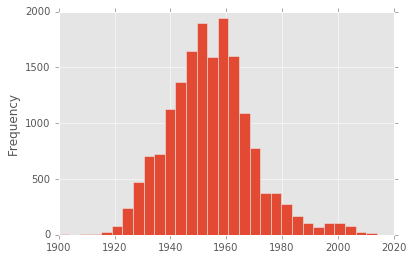

In [14]:
# Histogram plot of DOB year of patients
ax = dfs[1].DOB.dt.year.plot.hist(bins=30)

In [15]:
i=11
print table_names[i]
dfs[i].head()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-15-1f9be61cc7f9>, line 2)

In [16]:
i=0
for name in table_names:
    if name != 'ICD_list':
        print(i)
        print (name)
        dfs[i].info()
        print("\n========================================\n=========================================\n")
    i=i+1

0
all_encounter_data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82432 entries, 75857 to 79638
Data columns (total 41 columns):
Enc_ID            82432 non-null object
Enc_Nbr           82432 non-null int64
Enc_Date          82432 non-null datetime64[ns]
Person_ID         82432 non-null object
Person_Nbr        82432 non-null int64
Primary_Payer     82432 non-null object
Smoking_Status    59199 non-null object
BMI               22325 non-null object
BP                38219 non-null object
Glucose           30483 non-null object
A1C               12793 non-null float64
MR_OD_SPH         25476 non-null object
MR_OD_CYL         24693 non-null object
MR_OD_AXIS        19897 non-null object
MR_OD_DVA         24179 non-null object
MR_OD_NVA         18104 non-null object
MR_OS_SPH         25452 non-null object
MR_OS_CYL         24606 non-null object
MR_OS_AXIS        19417 non-null object
MR_OS_DVA         24068 non-null object
MR_OS_NVA         18035 non-null object
BB_OD_SPH         5

In [17]:
i=0
for name in table_names:
    if name != 'ICD_list':
        print(i)
        print (name)
        dfs[i].head()
        print("\n========================================\n=========================================\n")
    i=i+1

0
all_encounter_data


1
demographics


2
encounters


3
family_hist_for_Enc


4
family_hist_list


5
ICD_for_Enc


7
macula_findings_for_Enc


8
SL_Lens_for_Enc


9
SNOMED_problem_list


10
systemic_disease_for_Enc


11
systemic_disease_list


